### Project 1: Working with (experimental) data

- Reading and exploring data with Pandas (Handle multiple Data files)
- Plotting data
- Transform tabular Data
- Statistics
- linear regression (Scipy)

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Import os to interact with the system: you can use function like dir(os)...

### We will now have a look at two options to read our data

1. Using Numpy loadtxt
1. Using Pandas read_csv

In [3]:
# read data with numpy loadtxt
# defining two arrays
temperatures = []
resistance_data = []

for i,file in enumerate(os.listdir(os.getcwd())):
    if not '.txt' in file: continue
    data_file = np.loadtxt(file)
    temperature = float(file.split('temp_')[1].split('_data')[0])
    temperatures += [temperature]*data_file.shape[0]
    resistance_data += list(data_file)

print(len(temperatures), len(resistance_data))

110 110


In [4]:
# generate frame
df_data_experimental = pd.DataFrame()
df_data_experimental['T'] = np.array(temperatures) + 273.15
df_data_experimental['R'] = resistance_data
df_data_experimental.to_excel('df_data_experimental.xlsx')

## Reading multiple files with pandas:
1. read the files with pd.read_csv
2. Use pd.concat to combine the Data in one Dataframe

https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#csv

#### 1. select the files to read

In [5]:
# Reading multiple files with pandas
import glob
files = glob.glob('temp_*.txt')
files

['temp_0.0_data.txt',
 'temp_10.0_data.txt',
 'temp_15.0_data.txt',
 'temp_20.0_data.txt',
 'temp_25.0_data.txt',
 'temp_30.0_data.txt',
 'temp_35.0_data.txt',
 'temp_40.0_data.txt',
 'temp_45.0_data.txt',
 'temp_5.0_data.txt',
 'temp_50.0_data.txt']

#### Now we will combine the resistance Data with concat!

In [6]:
result = pd.concat([pd.read_csv(f, names=['R']) for f in files], ignore_index=True)
result

#Adding temperature
temperatures=[]
for f in files:
    temperature = float(f.split('temp_')[1].split('_data')[0])
    temperatures += [temperature]*data_file.shape[0]
temperatures
result["T"]=temperatures
del(temperatures)
result

,R,T
0,0.060339,0.0
1,0.063475,0.0
2,0.064499,0.0
3,0.053053,0.0
4,0.060896,0.0
...,...,...
105,0.005509,50.0
106,0.007336,50.0
107,0.010817,50.0
108,0.002471,50.0


### Now lets explore our Data a bit!

In [7]:
# show how pandas interpreted the data types
result.dtypes

R    float64
T    float64
dtype: object

In [8]:
# show the first values
result.head(8)

,R,T
0,0.060339,0.0
1,0.063475,0.0
2,0.064499,0.0
3,0.053053,0.0
4,0.060896,0.0
5,0.056234,0.0
6,0.065813,0.0
7,0.057890,0.0


In [9]:
# show the last values
result.tail(3)

,R,T
107,0.010817,50.0
108,0.002471,50.0
109,-0.000990,50.0


In [10]:
# show information
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R       110 non-null    float64
 1   T       110 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [11]:
result.describe()

,R,T
count,110.000000,110.000000
mean,0.018504,25.000000
std,0.018185,15.883752
min,-0.000990,0.000000
25%,0.006323,10.000000
50%,0.009885,25.000000
75%,0.027237,40.000000
max,0.068364,50.000000


### Plotting the Data

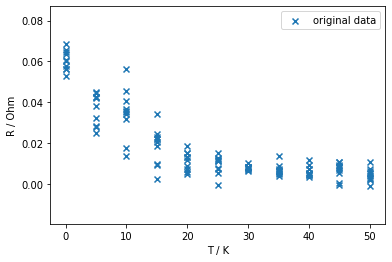

In [12]:
# Pandas interface
plt.scatter(result['T'], result['R'], marker='x',
         label='original data')
plt.xlabel('T / K')
plt.ylabel('R / Ohm')
plt.legend()
plt.show()

### Filter the Data

If you have unwanted data points you have to filter your data

In [14]:
# Filter unwanted datapoints
result = result[result['R']>=0.]
result

,R,T
0,0.060339,0.0
1,0.063475,0.0
2,0.064499,0.0
3,0.053053,0.0
4,0.060896,0.0
...,...,...
104,0.005047,50.0
105,0.005509,50.0
106,0.007336,50.0
107,0.010817,50.0


### Now we are ready to do calculations with our data

1. First we need the temperature in kelvin (add +273.15)

In [37]:
result['T'] = result['T'] + 273.15
result

C:\Users\nico\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,R,T,T / K
0,0.060339,273.15,273.15
1,0.063475,273.15,273.15
2,0.064499,273.15,273.15
3,0.053053,273.15,273.15
4,0.060896,273.15,273.15
...,...,...,...
104,0.005047,323.15,323.15
105,0.005509,323.15,323.15
106,0.007336,323.15,323.15
107,0.010817,323.15,323.15


### Statistics

In [38]:
df_means=result.groupby(['T'], as_index=False).mean()
df_errors=result.groupby(['T']).std()
df_means

,T,R,T / K
0,273.15,0.060694,273.15
1,278.15,0.036820,278.15
2,283.15,0.034661,283.15
3,288.15,0.018551,288.15
4,293.15,0.011252,293.15
5,298.15,0.010449,298.15
6,303.15,0.007821,303.15
7,308.15,0.006915,308.15
8,313.15,0.006258,313.15
9,318.15,0.007517,318.15


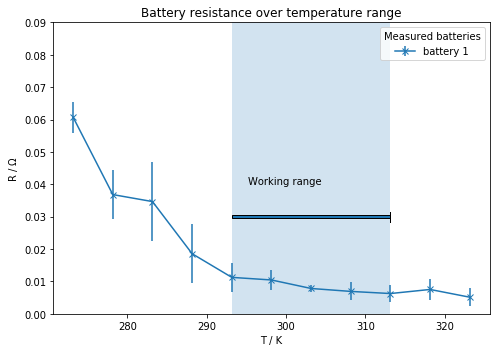

In [46]:
from matplotlib.patches import Rectangle, FancyArrow
from matplotlib.collections import PatchCollection

fig,ax=plt.subplots(figsize=(7,5))

rect = Rectangle((293.15,0.0),20, 0.09)
arrow = FancyArrow( 293.15, 0.03, 20,0.0, width=0.001, head_length=0)
pc = PatchCollection([rect], alpha=0.2)
ax.add_collection(pc)
ax.add_patch(arrow)

plt.errorbar(df_means['T'], df_means['R'], df_errors['R'], marker='x', label='battery 1')
plt.xlabel('T / K')
plt.ylabel('R / $\Omega$')
plt.legend(title='Measured batteries')
plt.title('Battery resistance over temperature range')
plt.tight_layout()
plt.savefig('battery_resistance.pdf')
plt.text( 295.15, 0.04, 'Working range' )
plt.ylim(0,0.09)
plt.show()

Now it is time to prepare the data for linear regression

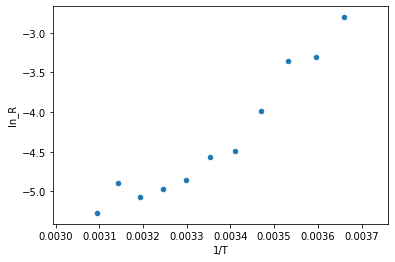

In [48]:
df_means['1/T'] = 1./df_means['T']
df_means['ln_R'] = np.log(df_means['R'])
df_means.plot.scatter('1/T','ln_R')
plt.xlim(df_means['1/T'].min()-0.0001, df_means['1/T'].max()+0.0001 )
plt.show()


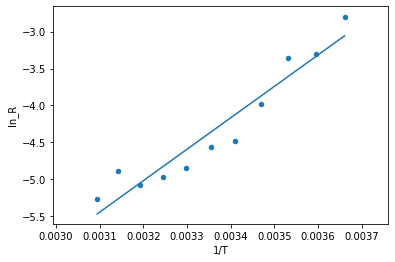

Coefficients: 
 [[4259.86042269]]
Coefficient of determination: 0.92


In [108]:
#Fitting Data
from sklearn import datasets, linear_model
lr = linear_model.LinearRegression()
from sklearn.metrics import mean_squared_error, r2_score

lr.fit(df_means['1/T'].values.reshape(-1,1), df_means['ln_R'].values.reshape(-1,1))
c=lr.coef_[0]
t=lr.intercept_
r2_value=lr.score(df_means['1/T'].rename_axis('1/T').values.reshape(-1,1), df_means['ln_R'].rename_axis('ln_R').values.reshape(-1,1))

df_means.plot('1/T','ln_R', kind='scatter')
plt.plot( (df_means['1/T'].min(),df_means['1/T'].max()), (df_means['1/T'].min()*c+t,df_means['1/T'].max()*c+t) )
plt.xlim(df_means['1/T'].min()-0.0001,df_means['1/T'].max()+0.0001)
plt.show()


# The coefficients
print('Coefficients: \n', lr.coef_)
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_value)